<a href="https://colab.research.google.com/github/sibghah/test1/blob/main/CCResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## GPU and Setting Up


In [ ]:
import torch
#print(torch.cuda.get_device_name(0))

In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
torch.backends.cudnn.benchmark = True

## Data Loading Pipeline

### Azure

In [ ]:
%%capture
pip install azure-storage-blob

In [ ]:
%%capture
pip install tensorflow_io

In [ ]:

from azure.storage.blob import BlobServiceClient
import pandas as pd
import time
import tensorflow_io as tfio
import tensorflow as tf


# upload_blob_images.py
# Python program to bulk upload jpg image files as blobs to azure storage
# Uses latest python SDK() for Azure blob storage
# Requires python 3.6 or above
import os
from azure.storage.blob import BlobServiceClient, BlobClient
from azure.storage.blob import ContentSettings, ContainerClient
 
# IMPORTANT: Replace connection string with your storage account connection string
# Usually starts with DefaultEndpointsProtocol=https;...
MY_CONNECTION_STRING = 'DefaultEndpointsProtocol=https;AccountName=sampoblob;AccountKey=Fbc8IrQjbh6iD62IY37FqKZY1pnCXKYq32dh7SdeNZjJ0eUD7vlc3x/L11D4/tjOTXwW3sFwxzqmGpg/MWj7vw==;EndpointSuffix=core.windows.net'
 
# Replace with blob container. This should be already created in azure storage.
MY_IMAGE_CONTAINER = "datasets//logoclassification"
 
# Replace with the local folder which contains the image files for upload
LOCAL_IMAGE_PATH = "/content/train_and_test/train"
 
class AzureBlobFileUploader:
  def __init__(self):
    print("Intializing AzureBlobFileUploader")
 
    # Initialize the connection to Azure storage account
    self.blob_service_client =  BlobServiceClient.from_connection_string(MY_CONNECTION_STRING)
 
  def upload_all_images_in_folder(self):
    # Get all files with jpg extension and exclude directories

    all_file_names = []
    for folder in os.listdir(LOCAL_IMAGE_PATH):
      #folder_path = os.path.join(LOCAL_IMAGE_PATH, folder)
      for company_name in os.listdir(os.path.join(LOCAL_IMAGE_PATH, folder)):
        company_path = os.path.join(folder, company_name)
        for company_logo in os.listdir(os.path.join(LOCAL_IMAGE_PATH, company_path)):
          logo_path = os.path.join(company_path, company_logo)
          if os.path.isfile(os.path.join(LOCAL_IMAGE_PATH, logo_path)):
            all_file_names.append(logo_path)
 
    # Upload each file
    for file_name in all_file_names:
      self.upload_image(file_name)
 
  def upload_image(self,file_name):
    # Create blob with same name as local file name
    blob_client = self.blob_service_client.get_blob_client(container=MY_IMAGE_CONTAINER,
                                                          blob=file_name)
    # Get full path to the file
    upload_file_path = os.path.join(LOCAL_IMAGE_PATH, file_name)
 
    # Create blob on storage
    # Overwrite if it already exists!
    image_content_setting = ContentSettings(content_type='image/jpeg')
    print(f"uploading file - {file_name}")
    with open(upload_file_path, "rb") as data:
      blob_client.upload_blob(data,overwrite=True,content_settings=image_content_setting)
 
 
# Initialize class and upload files
azure_blob_file_uploader = AzureBlobFileUploader()
azure_blob_file_uploader.upload_all_images_in_folder()

Streaming output truncated to the last 5000 lines.
uploading file - Accessories/Berghaus/51.jpg
uploading file - Accessories/Berghaus/43.jpg
uploading file - Accessories/Berghaus/65.jpg
uploading file - Accessories/Berghaus/68.jpg
uploading file - Accessories/Berghaus/40.jpg
uploading file - Accessories/Berghaus/52.jpg
uploading file - Accessories/Berghaus/45.jpg
uploading file - Accessories/Berghaus/36.jpg
uploading file - Accessories/Berghaus/34.jpg
uploading file - Accessories/Berghaus/63.jpg
uploading file - Accessories/Berghaus/69.jpg
uploading file - Accessories/Berghaus/8.jpg
uploading file - Accessories/Berghaus/53.jpg
uploading file - Accessories/Berghaus/9.jpg
uploading file - Accessories/Berghaus/49.jpg
uploading file - Accessories/Berghaus/16.jpg
uploading file - Accessories/Berghaus/5.jpg
uploading file - Accessories/Berghaus/32.jpg
uploading file - Accessories/Berghaus/67.jpg
uploading file - Accessories/Berghaus/1.jpg
uploading file - Accessories/Berghaus/26.jpg
uploadin

KeyboardInterrupt: ignored

In [ ]:
from azure.storage.blob import BlockBlobService

account_name = '<your-storage-account>'
account_key = '<your accout key>'
block_blob_service = BlockBlobService(account_name, account_key)

container_name = 'mycontainer'
blob_name = 'test.jpg'
blob = block_blob_service.get_blob_to_bytes(container_name, blob_name)

import numpy as np
import cv2
# use numpy to construct an array from the bytes
x = np.fromstring(blob.content, dtype='uint8')

# decode the array into an image
img = cv2.imdecode(x, cv2.IMREAD_UNCHANGED)
print img.shape

# show it
cv2.imshow("Image Window", img)
cv2.waitKey(0)

### Loading the data and creating HDF5 files

HDF5 files offer more efficient and faster storage for images and other large data. This makes them faster to load for the purposes of training and loading training data into the proposed model.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import shutil
import os

DATA_PATH = "/content/drive/MyDrive/Logo-2k+"
!unzip "/content/drive/MyDrive/Logo-2k+/train_and_test.zip"
!unzip "/content/drive/MyDrive/Logo-2k+/List.zip"



Streaming output truncated to the last 5000 lines.
  inflating: train_and_test/train/Transportation/Kuwahara/68.jpg  
   creating: train_and_test/train/Transportation/Lada/
  inflating: train_and_test/train/Transportation/Lada/1.jpg  
  inflating: train_and_test/train/Transportation/Lada/10.jpg  
  inflating: train_and_test/train/Transportation/Lada/11.jpg  
  inflating: train_and_test/train/Transportation/Lada/12.jpg  
  inflating: train_and_test/train/Transportation/Lada/13.jpg  
  inflating: train_and_test/train/Transportation/Lada/14.jpg  
  inflating: train_and_test/train/Transportation/Lada/16.jpg  
  inflating: train_and_test/train/Transportation/Lada/17.jpg  
  inflating: train_and_test/train/Transportation/Lada/2.jpg  
  inflating: train_and_test/train/Transportation/Lada/20.jpg  
  inflating: train_and_test/train/Transportation/Lada/22.jpg  
  inflating: train_and_test/train/Transportation/Lada/23.jpg  
  inflating: train_and_test/train/Transportation/Lada/24.jpg  
  inflatin

In [ ]:
import h5py
import os
import numpy as np
import pandas as pd
import csv

TRAIN_PATH = "/content/train_and_test/train"
IMG_H5_PATH = "/content/train_and_test/imgs.hdf5"
LBL_H5_PATH = "/content/train_and_test/lbls.hdf5"
LBL_TXT_PATH = '/content/List/train_images.txt'
LBL_CSV_PATH = '/content/train_and_test/train_labels.csv'

def convert_labels_h5(lbl_txt_path, lbl_csv_path, lbl_save_path):
  #convert txt file to csv
  txt_file = pd.read_csv(lbl_txt_path, names=["Labels"])
  txt_file.to_csv(lbl_csv_path, index=None)
  
  #convert csv to hdf5
  df = pd.read_csv(lbl_csv_path)
  df.to_hdf(lbl_save_path, 'data')


def convert_images_h5(train_path, img_save_path):
  hf = h5py.File(img_save_path, 'a')

  #iterate through all the category and logo folders and create an hdf5 file that preserves that strucutre
  for d in os.listdir(train_path):
    category = os.path.join(train_path, d)
    grp = hf.require_group(category)

    for j in os.listdir(category):
      logo_name = os.path.join(category, j)
      subgrp = grp.require_group(j)

      for k in os.listdir(logo_name):
        img_path = os.path.join(logo_name, k)
        
        with open(img_path, 'rb') as img_f:
          binary_data = img_f.read()
        
        binary_data_np = np.asarray(binary_data)
        #datasets are required to store the groups and files, require_dataset is used instead of create_dataset in case the dataset already exists
        dset = subgrp.require_dataset(k, data=binary_data_np, dtype=binary_data_np.dtype, shape=binary_data_np.shape)

  hf.close()

convert_labels_h5(LBL_TXT_PATH, LBL_CSV_PATH, LBL_H5_PATH)
convert_images_h5(TRAIN_PATH, IMG_H5_PATH)

### Testing the HDF5 file structure

NexusFormat is used to see the structure of a HDF5 file, since they contain groups and subgroups. This is ideal for debugging. The remainder of this section tests if the hdf5 files have been created as expected and all of the data can be retrieved without loss.

In [ ]:
pip install nexusformat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79 kB 4.3 MB/s 


In [ ]:
## to see format of the hdf5 file

import nexusformat.nexus as nx
f = nx.nxload('/content/train_and_test/train/imgs.hdf5')
print(f.tree)

root:NXroot
  data = uint8(486377x3x32x32)
  labels:NXgroup
    ae_grayscale = int32(486377)
    resnet:NXgroup
      rc_32 = int32(486336)
        @probs = [0.022715 0.033789 0.039719 ... 0.027526 0.027...
      rc_64 = int32(486336)
        @probs = [0.01455  0.01406  0.020533 ... 0.016517 0.012...
      rc_128 = int32(486336)
        @probs = [0.007413 0.007458 0.006816 ... 0.005759 0.006...
  meta_data:NXgroup
    names = 


In [ ]:
## only run to convert back to text/labels to test how well the hdf5 works
import sys
import random

# prints a random label from the labels hdf5 file to test that the file contents can be accessed in the expected way
# should print text that corresponds to an actual company name from the dataset along with the image id
def test_random_label(lbl_save_path):
  index = random.randint(0, 167139)
  df = pd.read_hdf(lbl_save_path)
  label = df.iloc[index]['Labels'] #add header to csv, the header of the csv is the 
  print(label)

test_random_label(LBL_H5_PATH)


In [ ]:
## only run to convert back to images to test how well the hdf5 works

from PIL import Image
import io
import matplotlib.pyplot as plt


# similar to what the above does for text, but tests if a single image can be retrieved back from the hdf5
def test_images_h5(img_save_path):
  data = []  # list all images files full path 'group/subgroup/b.png' for e.g. ./A/a/b.png. 

  group = [] # list all groups and subgroups in hdf5 file

  def func(name, obj):     # function to recursively store all the keys
      if isinstance(obj, h5py.Dataset):
          data.append(name)
      elif isinstance(obj, h5py.Group):
          group.append(name)

  hf = h5py.File(img_save_path, 'r')
  hf.visititems(func)  

  for j in data:
      kk = np.array(hf[j])#
      img = Image.open(io.BytesIO(kk))

      fig, ax = plt.subplots(figsize=(8, 8))
      ax.set_xticks([]); ax.set_yticks([])
      ax.imshow(img)
      break #to test a single image, remove to see all 

test_images_h5(IMG_H5_PATH)

### Creating the Dataset and Dataloader

Pytorch datasets decouple any code relating to the dataset from code that deals with the model and the network. The following snippet creates a custom dataset from the logo data and labels. In the initialisation function, the paths of each of the logo images, and their labels. The images are only retrieved in the __getitem__ function to reduce the overhead of the initialisation, since the dataset will be used to created a dataloader that loads data in batches. Therefore the images will only be loaded when they are actually needed. The data is preprocessed so that all the images are the same size and had random transformations applied, which include zooming, saturation changing, contrast changing and rotation to allow the model to learn a logo better. Random cutouts have also been applied for the same purpose.   <br> <br>
The helper functions named return_labels and return_data are for data exploration purposes and not used by the model.

In [ ]:
import torch.utils.data as data
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from torchvision.utils import save_image
from PIL import Image
import io
from sklearn import preprocessing
 
class LogoH5Dataset(data.Dataset):

  def visit_keys(self, name, obj):     # function to recursively store all the keys of hdf5 file
      if isinstance(obj, h5py.Dataset):
          self.idata.append(name)
      elif isinstance(obj, h5py.Group):
          self.igroup.append(name)


  def __init__(self, img_dir, lbl_dir, target_transform = None):
    self.img_h5 = h5py.File(img_dir, 'r')
    self.lbl_h5 = h5py.File(lbl_dir, 'r')

    self.img_key = list(self.img_h5.keys())[0]
    self.lbl_key = list(self.lbl_h5.keys())[0]

    #self.transform = transform
    self.target_transform = target_transform

    self.idata, self.igroup = [], []
    self.ihf = h5py.File(img_dir, 'r')
    self.ihf.visititems(self.visit_keys)  

    self.labels = []

    # populate the label list and then convert the text labels to integers, so that pytorch can convert labels to tensors, then store the string labels and integers in a dictionary, with the keys as strings
    df = pd.read_hdf(LBL_H5_PATH)
    for i in range(len(df)):
      lab = df.iloc[i]['Labels']
      self.labels.append(lab.split('/')[-2]) 
    ilabels = []
    ilabels = preprocessing.LabelEncoder()
    self.targets = ilabels.fit_transform(self.labels)
    self.target_dict = dict(zip(self.labels, self.targets))

    self.num_images = len(self.labels)
  
  def __len__(self):
    return self.num_images
  
  def return_labels(self):
    return self.labels

  def return_data(self):
    return self.idata


  def __getitem__(self, idx):
    #need to get file path from idx
    file_path = self.idata[idx]
    kk = np.array(self.ihf[file_path]) #file_path is used as a key to obtain the image array
    
    img = Image.open(io.BytesIO(kk)) #the hdf5 format then has to be converted to an image


    df = pd.read_hdf(LBL_H5_PATH)
    label = df.iloc[idx]['Labels'] 


    img = np.asarray(img)
    npimg = (img * 255).round().astype(np.uint8)
    label = self.labels[idx]

    ll = file_path.split('/')[-2] #the label can be generated from the file path
    lbl = self.target_dict.get(ll) #obtain the integer version of the label from the dictionary

    npimg = self.transform(npimg) 
    npimg = np.asarray(npimg)
    return (255-npimg), lbl, file_path
  
  #AlexNet requires the input images to be in the following format
  transform = transforms.Compose([
            transforms.ToPILImage(),
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),

        ])
  



The RandomBatchSampler is used to make the dataloader faster, as loading HDF5 or other large files in general slow during training. The random shuffling of data makes the batch load faster because linearly quierying a single batch in linear fashion takes $batch\_size*i$ time, where i is the batch index. This sampler creates random sequential batches from the dataset. Once the start index of the batch is found, the rest of that data in that batch can be found with an overhead cost that is of the order of finding the start index. 

In [ ]:
#sampler or dataloader with random batch sampler
from torch.utils.data import Sampler

class RandomBatchSampler(Sampler):
  def __init__(self, dataset, batch_size):
    self.batch_size = batch_size
    self.dataset_length = len(dataset)
    self.num_batches = self.dataset_length // self.batch_size
    self.batch_ids = torch.randperm(int(self.num_batches))

  def __len__(self):
    return self.batch_size
  
  def __iter__(self):
    for id in self.batch_ids:
      idx = torch.arange(id * self.batch_size, (id + 1) * self.batch_size)
      for index in idx:
        yield int(index)
      if int(self.num_batches) < self.num_batches:
        idx = torch.arange(int(self.num_batches) < self.num_batches, self.dataset_length)
        for index in idx:
          yield int(index)

In [ ]:
torch.manual_seed(0)
np.random.seed(0) 

Using a Pytorch dataloader the data can be loaded in batches to avoid running out of memory in a single epoch and batching also allows for the reduction of model overfitting. Each iteration of the dataloader returns a batch that includes images and their corresponding labels. Internally multiprocessing is also used which speeds up the loading. Other samplers have been imported here to test the speed of the custom RandomBatchSampler, the SequentialSampler is the only Pytorch sampler that reached comparable speeds. 

In [ ]:
from torch.utils.data import DataLoader, Sampler, BatchSampler, SequentialSampler, WeightedRandomSampler, SubsetRandomSampler
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from torchvision.utils import save_image
import torch
#import time

BATCH_SIZE = 64 
SHUFFLE = False #cannot use shuffle with a batch sampler
NUM_WORKERS = 6

#start = time.time()
training_set = LogoH5Dataset(IMG_H5_PATH, LBL_H5_PATH)
training_generator = torch.utils.data.DataLoader(training_set, batch_sampler=BatchSampler(
                    RandomBatchSampler(training_set, BATCH_SIZE), batch_size=BATCH_SIZE, drop_last=False), shuffle=SHUFFLE, num_workers=NUM_WORKERS) #use batch_sampler, not sampler because sampler uses the whole list of batches
#end = time.time()
#print(end-start)                    

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


### Testing the Dataloader
The following snippet is used to ensure that the dataloader and dataset is loading the HDF5 file data as expected and can also be used to see what individual batches look like. It is only for testing purposes.

tensor([1184, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188,
        1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188,
        1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188,
        1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188,
        1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1188, 1189, 1189,
        1189, 1189, 1189, 1189])


TypeError: ignored

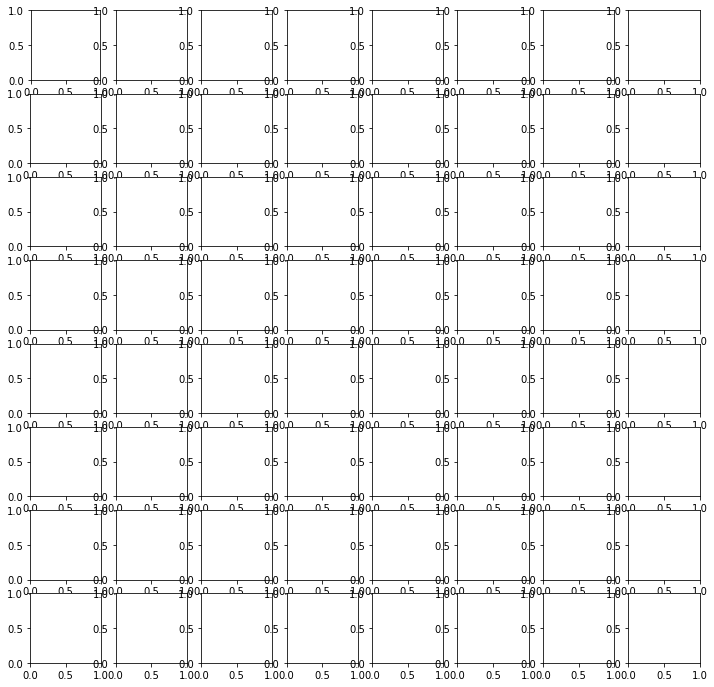

In [ ]:
## Only run to test dataloader/see what batches look like
# NOTE: To view images and run this cell without error, comment the transform line in the LogoH5Dataset class
from PIL import Image
import io

def show_images(images, batch_size):

    no_axes = int(np.ceil(batch_size**0.5))
    _, axs = plt.subplots(no_axes, no_axes, figsize=(12, 12))
    axs = axs.flatten()
    for img, ax in zip(images, axs):
        ax.imshow(img)
    plt.show()

def show_batch(dl, batch_size):
    for images in dl:
        print(images[1])
        show_images(images[0], BATCH_SIZE)
        #break #to test a single batch, remove to see all batches

show_batch(training_generator, BATCH_SIZE)

## Data Exploration


Data Exploration will show if there is any missing or corrupt data that would prevent the model from training. A separate folder is created for data exploration that does not include any of the category or logo folders. The first snippet ensures that the number of labels and images is as expected. 

In [ ]:
mkdir '/content/train_and_test/exploration_folder'

In [ ]:
#moving all image files out of their category folders to a single folder for data exploration

import shutil
import os

source = '/content/train_and_test/train'
destination = '/content/train_and_test/exploration_folder'

cats = [] #the category labels, e.g. Accessories, Food...
cat_counts = [] #a count of the number of categories to ensure that there are 10

comps = [] #names of the companies
logo_counts = [] #a count of the number of companies/different types of logos

complogos = [] #the file paths of each of the logo images


for dir in os.listdir(source):
  cat_count = 0
  categories = os.path.join(source, dir)
  cats.append(categories.split('/')[-1])
  for company in os.listdir(categories):
    logo_count = 0
    company_name = os.path.join(categories, company)
    comps.append(company_name.split('/')[-1])
    for image in os.listdir(company_name):
      image_name = os.path.join(company_name, image)
      complogos.append(image_name.split('/')[-1])
      if(os.path.isfile(image_name)):
        logo_count += 1;
        cat_count += 1;
        split_name = image_name.split(".")
        new_image_path = split_name[0] + company + '.jpg'
        new_image_name = new_image_path.split("/")[-1]
        shutil.copy(image_name, os.path.join(destination, new_image_name))
    logo_counts.append(logo_count)
  cat_counts.append(cat_count)


print(len(cats))
print(len(comps))
print(len(complogos))
print(len(logo_counts))
print(len(cat_counts))

10
2341
116958
2341
10


---

### Checking for Class Imbalances
The following snippet tests for class imbalances that may prevent the model from learning without significant bias to a certain class. The results show that while there are more images in the food sector, the number of logos for each company is generally balanced. The small discrepancies in the balance may also account for the fact that some logos/companies are less well known and less likely to be found on potential company websites or be an indicator of significant traction, so bias against those logos may be acceptable.

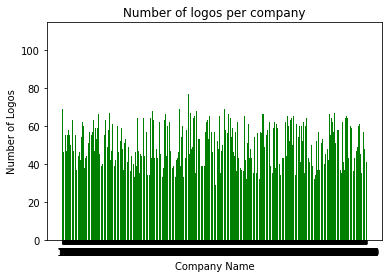

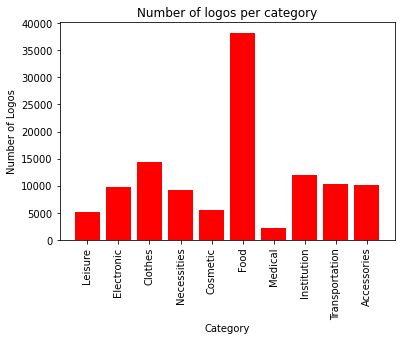

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

x_pos = [i for i, _ in enumerate(comps)]

plt.bar(x_pos, logo_counts, color='green')
plt.xlabel("Company Name")
plt.ylabel("Number of Logos")
plt.title("Number of logos per company")
plt.xticks(x_pos)
plt.show()

cat_pos = [i for i, _ in enumerate(cats)]
plt.bar(cat_pos, cat_counts, color='red')
plt.xlabel("Category")
plt.ylabel("Number of Logos")
plt.title("Number of logos per category")
plt.xticks(cat_pos, cats, rotation='vertical')
plt.show()

---

### Sweetviz HTML Report
**Sweetviz** is a library that generates a HTML report that can be used to analyse training data, it is ideal for finding missing data rather than manually checking the dataset. The data must first be put into a Pandas dataframe format. 

In [ ]:
%%capture
pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 7.2 MB/s 


In [ ]:
import pandas as pd
import sweetviz as sv

#create a pandas dataframe
exp_df = pd.DataFrame(data={'images':training_set.return_data(), 'labels':training_set.return_labels()})
exp_df = exp_df.applymap(str)
print(exp_df)

my_report = sv.analyze([exp_df, "Train"])
my_report.show_html('Report.html')

                                                   images   labels
0       content/train_and_test/train/Accessories/24sev...  24seven
1       content/train_and_test/train/Accessories/24sev...  24seven
2       content/train_and_test/train/Accessories/24sev...  24seven
3       content/train_and_test/train/Accessories/24sev...  24seven
4       content/train_and_test/train/Accessories/24sev...  24seven
...                                                   ...      ...
116953  content/train_and_test/train/Transportation/su...   Yamaha
116954  content/train_and_test/train/Transportation/su...   Yamaha
116955  content/train_and_test/train/Transportation/su...   Yamaha
116956  content/train_and_test/train/Transportation/su...   Yamaha
116957  content/train_and_test/train/Transportation/su...   Yamaha

[116958 rows x 2 columns]


                                             |          | [  0%]   00:00 -> (? left)

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
exp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116958 entries, 0 to 116957
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   images  116958 non-null  object
 1   labels  116958 non-null  object
dtypes: object(2)
memory usage: 1.8+ MB


---

### Individual Image Inspection
The following two snippets can be used to analyse individual images and their pixel intensities. This is useful in understanding which types of images help the model to train optimally.

Image Dimensions: 256 by 256 pixels
Max pixel value: 255.0000, Min pixel value: 0.0000
Mean pixel value: 160.2503, Standard Deviation 71.5183


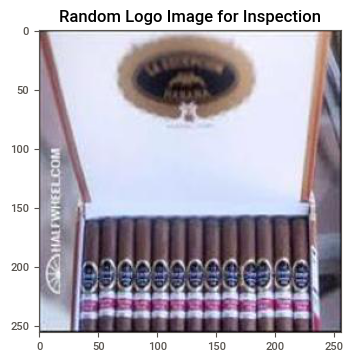

In [ ]:
import random

sample_no = random.randint(0, training_set.__len__()-1)
sample_img = exp_df['images'][sample_no]
raw_image = plt.imread(os.path.join('/',sample_img))
plt.imshow(raw_image)
plt.title('Random Logo Image for Inspection')
print(f"Image Dimensions: {raw_image.shape[0]} by {raw_image.shape[1]} pixels")
print(f"Max pixel value: {raw_image.max():.4f}, Min pixel value: {raw_image.min():.4f}")
print(f"Mean pixel value: {raw_image.mean():.4f}, Standard Deviation {raw_image.std():.4f}")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '# Pixels in Image')

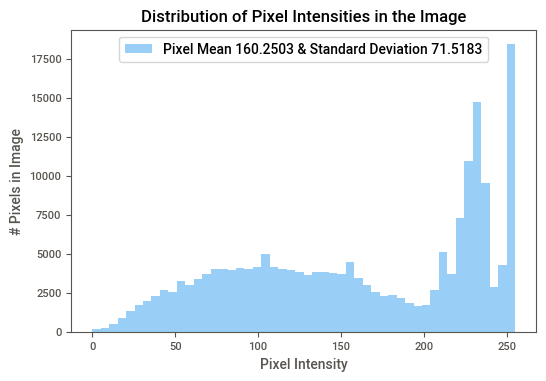

In [ ]:
import seaborn as sns

# Plot a histogram of the distribution of the pixels
sns.distplot(raw_image.ravel(), 
             label=f'Pixel Mean {np.mean(raw_image):.4f} & Standard Deviation {np.std(raw_image):.4f}', kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

## Feature Extraction

The following two snippets extract features from the images, that could be used to help train the model better but also could be used to preprocess the images. <br> <br> Thresholding first converts the image from colour to greyscale and then the Otsu thresholding algorithm identifies the area of interest in the image, while also removing noise and features that may be unnecessary to the model. This can also help to reduce overfitting on these unnecessary features. Otsu thresholding is the most adaptive thresholding algorithm, therefore it was chosen. <br> <br> Edge detection is used to find the boundaries of objects within images. Similar to thresholding it can identify areas of interest, but it can also recognise distinct shapes, which logos often use. 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (256, 256, 3) looks like an RGB image
  del sys.path[0]


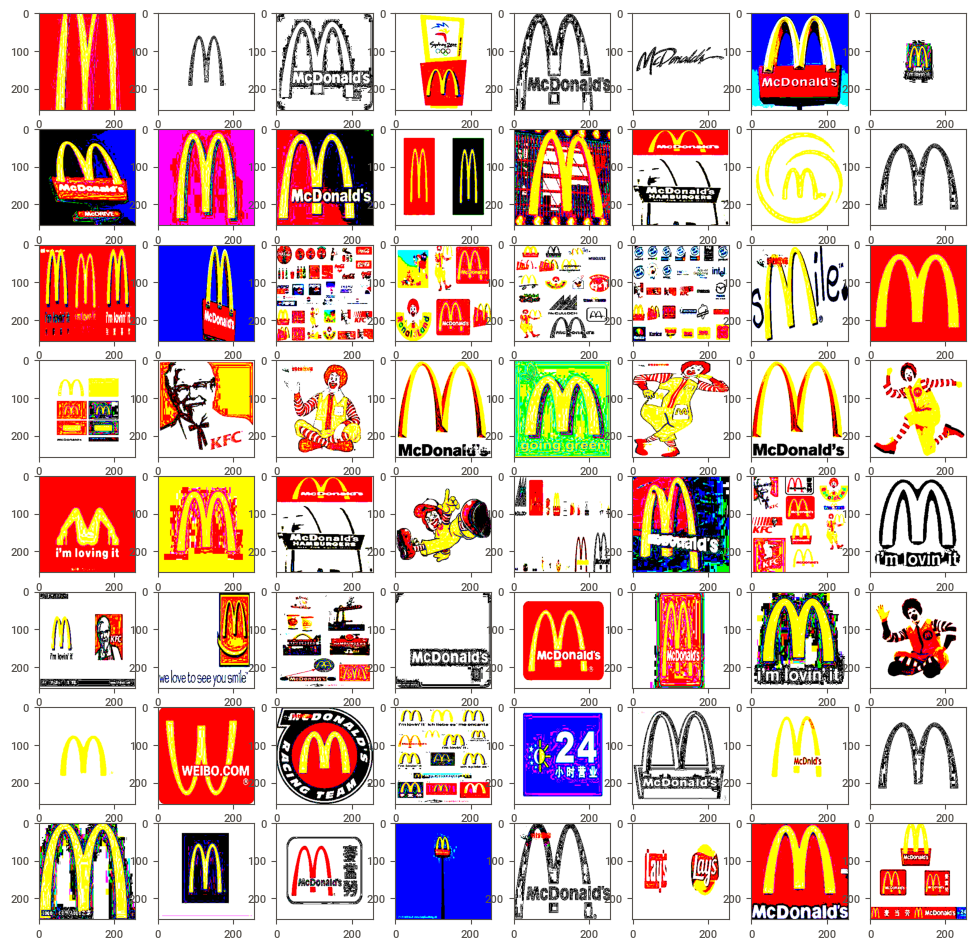

In [ ]:
# Thresholding: using the dataloader, thresholding is applied to the batch
from skimage.filters import threshold_otsu
from skimage import data
from PIL import Image
import cv2 as cv

def th_show_images(images, batch_size):

    no_axes = int(np.ceil(batch_size**0.5))
    _, axs = plt.subplots(no_axes, no_axes, figsize=(12, 12))
    axs = axs.flatten()
    for img, ax in zip(images, axs):
        threshold_value = threshold_otsu(img.detach().numpy())
        img_threshold = (img > threshold_value).int() * 255
        ax.imshow(img_threshold)
    plt.show()

def th_show_batch(dl, batch_size):
    for images in dl:
        show_images(images[0], BATCH_SIZE)
        break #to test a single batch, remove to see all batches

th_show_batch(training_generator, BATCH_SIZE)

---

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


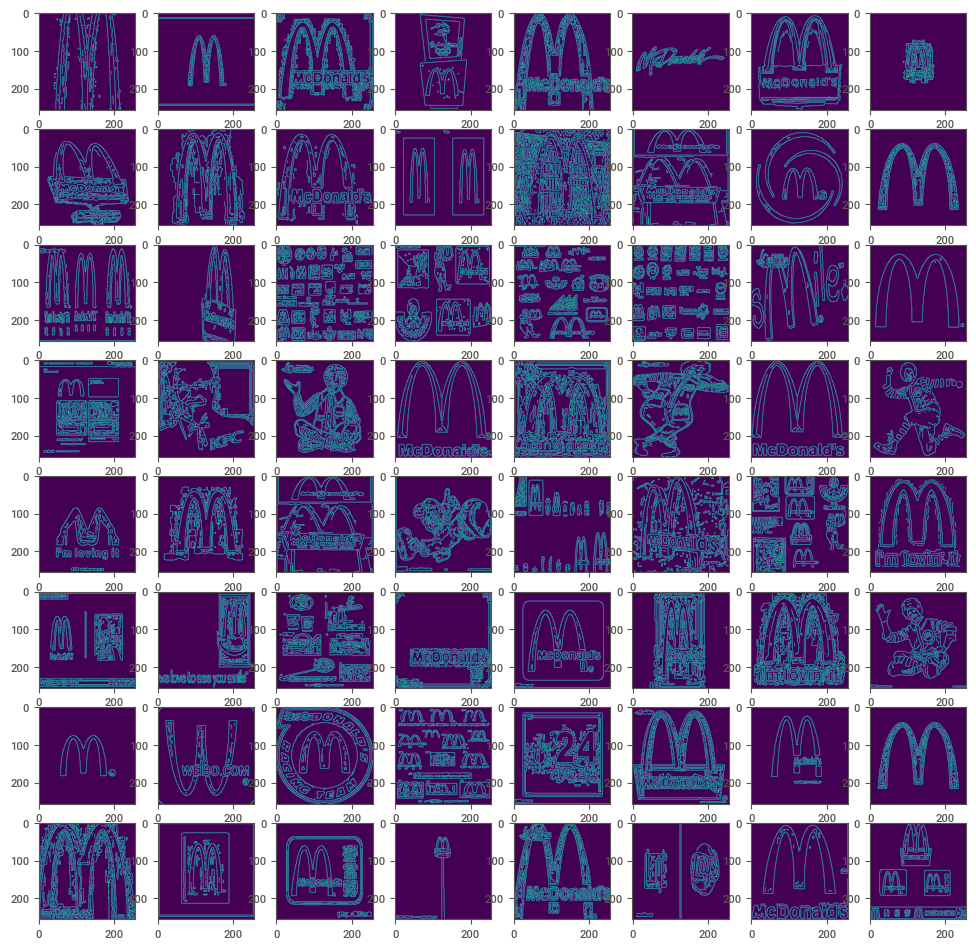

In [ ]:
# Edge Detection: using the dataloader, batches can be analysed for edge detection

from skimage.feature import canny
from skimage import color

from PIL import Image
import io

def ed_show_images(images, batch_size):

    no_axes = int(np.ceil(batch_size**0.5))
    _, axs = plt.subplots(no_axes, no_axes, figsize=(12, 12))
    axs = axs.flatten()
    for img, ax in zip(images, axs):
        img = color.rgb2gray(img)
        edges = canny(img)
        ax.imshow(edges)
    plt.show()

def ed_show_batch(dl, batch_size):
    for images in dl:
        show_images(images[0], BATCH_SIZE)
        break #to test a single batch, remove to see all batches

ed_show_batch(training_generator, BATCH_SIZE)

## Model

In [ ]:
import torch.nn as nn

resnet = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18')
resnet.eval()
resnet.fc = nn.Linear(512, 2341) #change the output layer to account for the number of companies

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


In [ ]:
import torch.optim as optim
import torch.nn as nn

res_loss = nn.CrossEntropyLoss() 
res_optimiser = optim.SGD(resnet.parameters(), lr=0.001, momentum=0.9)

The training uses k-fold cross validation, the model will fully train on each fold. This will allow the best model parameters to be obtained. 

In [ ]:
from sklearn.model_selection import KFold

EPOCHS = 10
k = 5
kfold = KFold(n_splits=k)


def train_model(model, loss_fn, optimiser, modelsavepath):

  best_acc = 0
  best_model = model.state_dict()

  for fold, (train_ids, val_ids) in enumerate(kfold.split(training_set)):
    print('Fold {}'.format(fold + 1))

    #k-fold validation splits the indices of the training set at each fold into training indices and validation indices, by using subsets we can use the dataloader with k-fold cross validation
    train_set = torch.utils.data.Subset(training_set, train_ids) 
    val_set = torch.utils.data.Subset(training_set, val_ids)

    train_loader = torch.utils.data.DataLoader(train_set, batch_sampler=BatchSampler(
                      RandomBatchSampler(train_set, BATCH_SIZE), batch_size=BATCH_SIZE, drop_last=False), shuffle=SHUFFLE, num_workers=NUM_WORKERS)
    val_loader = torch.utils.data.DataLoader(val_set, batch_sampler=BatchSampler(
                      RandomBatchSampler(val_set, BATCH_SIZE), batch_size=BATCH_SIZE, drop_last=False), shuffle=SHUFFLE, num_workers=NUM_WORKERS)

    if torch.cuda.is_available():
      model = model.cuda()

    train_acc = 0


    for j in range(EPOCHS):
        train_loss, train_correct = 0.0, 0
        val_loss, val_correct = 0.0, 0

        #set model mode to training so that BatchNorm and Dropout are being updated
        model.train()    
        for batch_item in train_loader:
            data = batch_item[0]
            label = batch_item[1]
            if torch.cuda.is_available():
                data, label = data.cuda(), label.cuda()
            optimiser.zero_grad()
            targets = model(data)
            loss = loss_fn(targets,label)
            loss.backward()
            optimiser.step()
            train_loss += loss.item()
            scores, predictions = torch.max(targets.data, 1)
            train_correct += (predictions == label).sum().item()
        
        #set model model to eval/testing so that BatchNorm and Dropout are frozen
        model.eval()
        for batch_item in val_loader:
            data = batch_item[0]
            label = batch_item[1]
            if torch.cuda.is_available():
              data, label = data.cuda(), label.cuda()
            targets = model(data)
            loss = loss_fn(targets, label)
            val_loss += loss.item()
            scores, predictions = torch.max(targets.data, 1)
            val_correct += (predictions == label).sum().item()
        
        train_acc, val_acc = train_correct / BATCH_SIZE, val_correct / BATCH_SIZE
            
        print("Epoch:{}/{} AVG Training Loss:{:.3f} AVG Training Acc {:.2f}% AVG Val Loss:{:.3f} AVG Val Acc {:.2f} %".format(j + 1, EPOCHS, train_loss, train_acc, val_loss, val_acc))
        

    #update the best model details if a better model with better accuracy is obtained at the end of training a fold
    if(train_acc > best_acc): 
      best_acc = train_acc
      best_model = model.state_dict()

  torch.save(best_model, modelsavepath)

train_model(resnet, res_loss, res_optimiser, 'resnetbestmodel.pth')


Fold 1


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Process Process-6:
Process Process-5:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 300, in _bootstrap
    util._exit_function()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 300, in _bootstrap
    util._exit_function()
  File "/usr/lib/python3.7/multiprocessing/util.py", line 360, in _exit_function
    _run_finalizers()
  File "/usr/lib/python3.7/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/usr/lib/python

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-06038dec7c16>", line 73, in <module>
    train_model(resnet, res_loss, res_optimiser, 'resnetbestmodel.pth')
  File "<ipython-input-12-06038dec7c16>", line 44, in train_model
    loss.backward()
  File "/usr/local/lib/python3.7/dist-packages/torch/_tensor.py", line 396, in backward
    torch.autograd.backward(self, gradient, retain_graph, create_graph, inputs=inputs)
  File "/usr/local/lib/python3.7/dist-packages/torch/autograd/__init__.py", line 175, in backward
    allow_unreachable=True, accumulate_grad=True)  # Calls into the C++ engine to run the backward pass
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", lin

KeyboardInterrupt: ignored

## Model Testing

### Creating HDF5 Files for Test Data

In [ ]:
TEST_PATH = "/content/train_and_test/test"
TEST_IMG_H5_PATH = "/content/train_and_test/test_imgs.hdf5"
TEST_LBL_H5_PATH = "/content/train_and_test/test_lbls.hdf5"
TEST_LBL_TXT_PATH = '/content/List/test_images.txt'
TEST_LBL_CSV_PATH = '/content/train_and_test/test_labels.csv'

convert_labels_h5(TEST_LBL_TXT_PATH, TEST_LBL_CSV_PATH, TEST_LBL_H5_PATH)
convert_images_h5(TEST_PATH, TEST_IMG_H5_PATH)


In [ ]:
test_random_label(TEST_LBL_H5_PATH)
test_images_h5(TEST_IMG_H5_PATH)

### Test Dataset and Dataloader

In [ ]:
test_set = LogoH5Dataset(TEST_IMG_H5_PATH, TEST_LBL_H5_PATH)
test_generator = torch.utils.data.DataLoader(test_set, batch_sampler=BatchSampler(
                    RandomBatchSampler(test_set, BATCH_SIZE), batch_size=BATCH_SIZE, drop_last=False), shuffle=SHUFFLE, num_workers=NUM_WORKERS) #use batch_sampler, not sampler because sampler uses the whole list of batches


In [ ]:
show_batch(test_generator, BATCH_SIZE)

### Running Model on Test Set

In [ ]:
import torchvision.models as models
from skimage import io

#weights = models.ResNet18_Weights.DEFAULT
best_model = models.resnet18()
best_model.load_state_dict(torch.load('resnetbestmodel.pth'))
best_model.eval()

#get image from image path here

# # test_hf = h5py.File(TEST_IMG_H5_PATH, 'r')
# # test_hf.visititems(test_generator.visit_keys)  
# file_path = '/content/train_and_test/test/Accessories/24seven/12.jpg'
# #kk = np.array(test_hf[file_path]) #file_path is used as a key to obtain the image array
# test_img = Image.open(file_path)
# test_img = np.asarray(test_img)
# batch = preprocess(test_img).unsqueeze(0)
# prediction = best_model(batch).squeeze(0).softmax(0)
# class_id = prediction.argmax().item()
# score = prediction[class_id].item()
# category_name = weights.meta["categories"][class_id]
# print(f"{category_name}: {100 * score:.1f}%")


# best_model.eval()

def predict_batch(img_batch, true_labels, batch_index): #model accepts batches
  batch_correct = 0 #dataloader returns a batch of images and labels and does preprocessing

  outputs = best_model(img_batch)
  scores, predictions = torch.max(outputs, 1)
  predictions = predictions.cpu().numpy()
  batch_correct += (predictions == true_labels).sum().item()
  
  batch_accuracy = batch_correct / BATCH_SIZE
  print("Batch:{}/{} AVG Batch Acc {:.2f}% ".format(batch_index + 1, BATCH_SIZE, batch_accuracy))

  return predictions, batch_accuracy



def predict_testset(test_loader):
  i = 0
  batches_acc = []
  for data in test_loader:
    
    images = data[0]
    true_labels = data[1]
    
    if torch.cuda.is_available():
      images, true_labels = images.cuda(), true_labels.cuda()
    predicted_labels, batch_acc = predict_batch(images, true_labels, i)
    batches_acc.append(batch_acc)

    for j in range(len(predicted_labels)):
      text_label = test_loader.return_text_label(predicted_labels[j])
      actual_label = test_loader.return_text_label(true_labels[j])
      img_path = data[2][j]
      logo_img = io.imread(img_path)
      io.imshow(logo_img)
      #the dataloader returns the actual image, see if you can untransform the transform so that the images can be printed
      #show image, print prediction and then actual label
    i+=1
  total_acc = batches_acc.sum()/i
  print("AVG Test Set Acc {:.2f}% ".format(total_acc))

    
predict_testset(test_generator)


nematode: 22.5%
